### **Data Cleansing**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Audio
from unidecode import unidecode

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = pd.read_csv('/content/drive/My Drive/Group 7 - RMCS/REVISI/combined (2).csv')
# df.head()

In [8]:
df = pd.read_csv('/content/combined (2) (1).csv')
df.head()

,Filename,URL,webVideoUrl,artist,title,likeCount,shareCount,playCount,commentCount,bpm,beat
0,music_3.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@naomivaneeren/video/69...,Justin Timberlake,Mirrors,12900.0,197.0,94900.0,143.0,152.00,High
1,music_3.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@quincyhoonakker_/video...,Justin Timberlake,Mirrors,1723.0,21.0,72300.0,79.0,152.00,High
2,music_4.wav,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@io.dreamer_mk/video/69...,Pascal Letoublon,Friendships,8805.0,198.0,115300.0,52.0,80.75,Medium
3,music_6.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@milanvannleeuwen/video...,LPTHERAPPER,Lmss,227.0,0.0,62200.0,4.0,92.29,Medium
4,music_7.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@helen.c_/video/6884590...,Peter Wibe,Only Time Will Tell - Vocal Mix,4326.0,201.0,81200.0,354.0,129.20,High


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Filename      606 non-null    object 
 1   URL           606 non-null    object 
 2   webVideoUrl   606 non-null    object 
 3   artist        606 non-null    object 
 4   title         606 non-null    object 
 5   likeCount     606 non-null    float64
 6   shareCount    606 non-null    float64
 7   playCount     606 non-null    float64
 8   commentCount  606 non-null    float64
 9   bpm           606 non-null    float64
 10  beat          606 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.2+ KB


In [10]:
Audio(df.iloc[0]['URL'])

In [11]:
df['artist'].unique()

array(['Justin Timberlake', 'Pascal Letoublon', 'LPTHERAPPER',
       'Peter Wibe', 'Imagine Dragons', 'The Kid LAROI', 'Elvis Presley',
       'Jvla', 'WizKid', 'Sleepy Hallow', 'Studio Killers', 'Dua Lipa',
       'Hannah Montana', 'Xirali-3', 'To Dance and Have Fun',
       'Bobo Mbhele feat. Visca, Kabza De Small, DJ Maphorisa',
       'Subodh Su2', 'Elliot Van Coup', 'Maroon 5', 'TypeHeat',
       'Trevor Daniel', 'Pop Smoke', 'Serhat Durmus', 'Roar', 'MC Madan',
       'dullrainbow', 'Eminem', 'Adam Counts', 'Eric D',
       'Jasmin Mary Tadjiky', 'TroyBoi', 'Lemon Demon', 'Labrinth',
       'Judubre', 'David Guetta', 'Queen', 'Royal & the Serpent',
       'Hildur Guðnadóttir', 'DanceToTik',
       'Meridian Film Music Recordings', 'Panic! At The Disco',
       'Sam Fischer', 'Leo Desouza', 'CORPSE & Savage Ga$p', 'MC Teteu',
       'Bandas de Música', 'Vinyll', 'WhoHeem',
       'Edy Lemond;DJ Guuga;DJ Lucas Beat', 'Ander Huang & DJ Kuromi',
       'cults', 'Euge Groove', 'MC Ri

In [12]:
df['title'].unique()

array(['Mirrors', 'Friendships', 'Lmss',
       'Only Time Will Tell - Vocal Mix', 'Believer', 'WITHOUT YOU',
       'Jailhouse Rock (Spankox Re:Version - Highpass Radio Edit)',
       'Such a Whore (Stellular Version)', 'Joro', 'Deep End Freestyle',
       'Jenny', 'Blow Your Mind (Mwah)', "Nobody's Perfect", 'Hometown',
       'Dumb Dumb Challenge Dance',
       'iLwa Ntombo feat. Visca,Kabza De Small,DJ Maphorisa', 'Maya Bhai',
       'Say So (Instrumental Version) [Originally Performed by Doja Cat]',
       'Animals', 'Reality Can Be Whatever I Want', 'Falling',
       'What You Know Bout Love', 'La Câlin', "I Can't Handle Change",
       'Palhação do Mal', 'Get Lucky TikTok', 'Without Me', 'SexyBack',
       'Jingle Bell Rock', 'Savage Days', 'Bossy 4 (60)', 'KinjaBang',
       'BRODYQUEST', "Still Don't Know My Name", 'Neon',
       'Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afrojack)',
       'Bohemian Rhapsody', 'Overwhelmed', 'Bathroom Dance',
       'Billie Jean,Boo, F It Up 

In [13]:
def clean_and_normalize(text):
    # Remove accents using unidecode
    text_normalized = unidecode(text)

    # Replace specific characters
    text_normalized = text_normalized.replace('$', 's').replace('&', 'and').replace('9', 'i').replace(';', ' and ')

    # Remove non-alphabetic characters
    text_cleaned = ''.join(char if char.isalnum() or char.isspace() else ' ' for char in text_normalized)

    # Collapse multiple spaces into a single space
    text_cleaned = ' '.join(text_cleaned.split())

    return text_cleaned

In [14]:
artists = df['artist']
cleaned_artists = [clean_and_normalize(artist) for artist in artists]

for original, cleaned in zip(artists, cleaned_artists):
    print(f"Original: {original}")
    print(f"Cleaned: {cleaned}\n")

Original: Justin Timberlake
Cleaned: Justin Timberlake

Original: Justin Timberlake
Cleaned: Justin Timberlake

Original: Pascal Letoublon
Cleaned: Pascal Letoublon

Original: LPTHERAPPER
Cleaned: LPTHERAPPER

Original: Peter Wibe
Cleaned: Peter Wibe

Original: Imagine Dragons
Cleaned: Imagine Dragons

Original: The Kid LAROI
Cleaned: The Kid LAROI

Original: The Kid LAROI
Cleaned: The Kid LAROI

Original: The Kid LAROI
Cleaned: The Kid LAROI

Original: The Kid LAROI
Cleaned: The Kid LAROI

Original: Elvis Presley
Cleaned: Elvis Presley

Original: Jvla
Cleaned: Jvla

Original: WizKid
Cleaned: WizKid

Original: Sleepy Hallow
Cleaned: Sleepy Hallow

Original: Studio Killers
Cleaned: Studio Killers

Original: Studio Killers
Cleaned: Studio Killers

Original: Dua Lipa
Cleaned: Dua Lipa

Original: Hannah Montana
Cleaned: Hannah Montana

Original: Xirali-3
Cleaned: Xirali 3

Original: Xirali-3
Cleaned: Xirali 3

Original: Xirali-3
Cleaned: Xirali 3

Original: To Dance and Have Fun
Cleaned: T

In [15]:
titles = df['title']
cleaned_titles = [clean_and_normalize(title) for title in titles]

for original, cleaned in zip(titles, cleaned_titles):
    print(f"Original: {original}")
    print(f"Cleaned: {cleaned}\n")

Original: Mirrors
Cleaned: Mirrors

Original: Mirrors
Cleaned: Mirrors

Original: Friendships
Cleaned: Friendships

Original: Lmss
Cleaned: Lmss

Original: Only Time Will Tell - Vocal Mix
Cleaned: Only Time Will Tell Vocal Mix

Original: Believer
Cleaned: Believer

Original: WITHOUT YOU
Cleaned: WITHOUT YOU

Original: WITHOUT YOU
Cleaned: WITHOUT YOU

Original: WITHOUT YOU
Cleaned: WITHOUT YOU

Original: WITHOUT YOU
Cleaned: WITHOUT YOU

Original: Jailhouse Rock (Spankox Re:Version - Highpass Radio Edit)
Cleaned: Jailhouse Rock Spankox Re Version Highpass Radio Edit

Original: Such a Whore (Stellular Version)
Cleaned: Such a Whore Stellular Version

Original: Joro
Cleaned: Joro

Original: Deep End Freestyle
Cleaned: Deep End Freestyle

Original: Jenny
Cleaned: Jenny

Original: Jenny
Cleaned: Jenny

Original: Blow Your Mind (Mwah)
Cleaned: Blow Your Mind Mwah

Original: Nobody's Perfect
Cleaned: Nobody s Perfect

Original: Hometown
Cleaned: Hometown

Original: Hometown
Cleaned: Hometown

In [16]:
df['artist'] = df['artist'].apply(clean_and_normalize)
df['title'] = df['title'].apply(clean_and_normalize)

In [17]:
df['artist'].unique()

array(['Justin Timberlake', 'Pascal Letoublon', 'LPTHERAPPER',
       'Peter Wibe', 'Imagine Dragons', 'The Kid LAROI', 'Elvis Presley',
       'Jvla', 'WizKid', 'Sleepy Hallow', 'Studio Killers', 'Dua Lipa',
       'Hannah Montana', 'Xirali 3', 'To Dance and Have Fun',
       'Bobo Mbhele feat Visca Kabza De Small DJ Maphorisa', 'Subodh Su2',
       'Elliot Van Coup', 'Maroon 5', 'TypeHeat', 'Trevor Daniel',
       'Pop Smoke', 'Serhat Durmus', 'Roar', 'MC Madan', 'dullrainbow',
       'Eminem', 'Adam Counts', 'Eric D', 'Jasmin Mary Tadjiky',
       'TroyBoi', 'Lemon Demon', 'Labrinth', 'Judubre', 'David Guetta',
       'Queen', 'Royal and the Serpent', 'Hildur Gudnadottir',
       'DanceToTik', 'Meridian Film Music Recordings',
       'Panic At The Disco', 'Sam Fischer', 'Leo Desouza',
       'CORPSE and Savage Gasp', 'MC Teteu', 'Bandas de Musica', 'Vinyll',
       'WhoHeem', 'Edy Lemond and DJ Guuga and DJ Lucas Beat',
       'Ander Huang and DJ Kuromi', 'cults', 'Euge Groove', 'MC

In [18]:
df['title'].unique()

array(['Mirrors', 'Friendships', 'Lmss', 'Only Time Will Tell Vocal Mix',
       'Believer', 'WITHOUT YOU',
       'Jailhouse Rock Spankox Re Version Highpass Radio Edit',
       'Such a Whore Stellular Version', 'Joro', 'Deep End Freestyle',
       'Jenny', 'Blow Your Mind Mwah', 'Nobody s Perfect', 'Hometown',
       'Dumb Dumb Challenge Dance',
       'iLwa Ntombo feat Visca Kabza De Small DJ Maphorisa', 'Maya Bhai',
       'Say So Instrumental Version Originally Performed by Doja Cat',
       'Animals', 'Reality Can Be Whatever I Want', 'Falling',
       'What You Know Bout Love', 'La Calin', 'I Can t Handle Change',
       'Palhacao do Mal', 'Get Lucky TikTok', 'Without Me', 'SexyBack',
       'Jingle Bell Rock', 'Savage Days', 'Bossy 4 60', 'KinjaBang',
       'BRODYQUEST', 'Still Don t Know My Name', 'Neon',
       'Hey Mama feat Nicki Minaj Bebe Rexha and Afrojack',
       'Bohemian Rhapsody', 'Overwhelmed', 'Bathroom Dance',
       'Billie Jean Boo F It Up Tik', 'Mission Impos

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Filename      606 non-null    object 
 1   URL           606 non-null    object 
 2   webVideoUrl   606 non-null    object 
 3   artist        606 non-null    object 
 4   title         606 non-null    object 
 5   likeCount     606 non-null    float64
 6   shareCount    606 non-null    float64
 7   playCount     606 non-null    float64
 8   commentCount  606 non-null    float64
 9   bpm           606 non-null    float64
 10  beat          606 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.2+ KB


In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Filename        0
URL             0
webVideoUrl     0
artist          0
title           0
likeCount       0
shareCount      0
playCount       0
commentCount    0
bpm             0
beat            0
dtype: int64

In [22]:
df['beat'].value_counts()

High      366
Medium    219
Slow       21
Name: beat, dtype: int64

In [23]:
df['likeCount'] = df['likeCount'].astype('int64')
df['shareCount'] = df['shareCount'].astype('int64')
df['playCount'] = df['playCount'].astype('int64')
df['commentCount'] = df['commentCount'].astype('int64')
df.dtypes

Filename         object
URL              object
webVideoUrl      object
artist           object
title            object
likeCount         int64
shareCount        int64
playCount         int64
commentCount      int64
bpm             float64
beat             object
dtype: object

In [24]:
df['webVideoUrl'].duplicated().sum()

99

In [25]:
df[df['webVideoUrl'].duplicated()]

,Filename,URL,webVideoUrl,artist,title,likeCount,shareCount,playCount,commentCount,bpm,beat
78,music_108.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@pudding.broodje/video/...,Studio Killers,Jenny,10700,104,90700,209,136.00,High
79,music_108.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@ace_equestrian/video/6...,Studio Killers,Jenny,42600,162,132800,742,136.00,High
109,music_162.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/3...,https://www.tiktok.com/@_ylvax/video/690275111...,The Kid LAROI,WITHOUT YOU,2080,17,39300,19,123.05,High
110,music_162.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/3...,https://www.tiktok.com/@sandro.officialnnl/vid...,The Kid LAROI,WITHOUT YOU,4568,21,82700,91,123.05,High
111,music_162.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/3...,https://www.tiktok.com/@chasexlexie/video/6907...,The Kid LAROI,WITHOUT YOU,2475,11,92400,11,123.05,High
...,...,...,...,...,...,...,...,...,...,...,...
589,music_966.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@yohankawidu6257/video/...,BigDoggy,Muthu Muthu feat Master D,1401,1,12300,5,184.57,High
590,music_966.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@shanikasadanjana/video...,BigDoggy,Muthu Muthu feat Master D,499,1,15300,12,184.57,High
592,music_969.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/e...,https://www.tiktok.com/@lidiaconrado/video/689...,Ander Huang and DJ Kuromi,F Boy,2809,46,37700,20,129.20,High
593,music_969.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/e...,https://www.tiktok.com/@planeta_luizbacci/vide...,Ander Huang and DJ Kuromi,F Boy,4141,132,42000,140,129.20,High


In [26]:
df.iloc[78]['webVideoUrl']

'https://www.tiktok.com/@pudding.broodje/video/6900948690186407170'

In [27]:
url = 'https://www.tiktok.com/@pudding.broodje/video/6900948690186407170'
selected_row = df.loc[df['webVideoUrl'] == url, 'webVideoUrl']

print(selected_row)

14    https://www.tiktok.com/@pudding.broodje/video/...
78    https://www.tiktok.com/@pudding.broodje/video/...
Name: webVideoUrl, dtype: object


In [28]:
print(df.iloc[14]['webVideoUrl'])
print(df.iloc[78]['webVideoUrl'])

https://www.tiktok.com/@pudding.broodje/video/6900948690186407170
https://www.tiktok.com/@pudding.broodje/video/6900948690186407170


In [29]:
check_rows = df.iloc[[14, 78]]
check_rows

,Filename,URL,webVideoUrl,artist,title,likeCount,shareCount,playCount,commentCount,bpm,beat
14,music_19.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@pudding.broodje/video/...,Studio Killers,Jenny,10700,104,90700,209,136.0,High
78,music_108.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@pudding.broodje/video/...,Studio Killers,Jenny,10700,104,90700,209,136.0,High


In [30]:
print('Unique Videos: ', df['webVideoUrl'].nunique())
print('Total Data: ', df.shape[0])

Unique Videos:  507
Total Data:  606


In [31]:
df_unique = df.drop_duplicates(subset=['webVideoUrl'])

In [32]:
print('Unique Videos: ', df_unique['webVideoUrl'].nunique())
print('Total Data: ', df_unique.shape[0])

Unique Videos:  507
Total Data:  507


### **EDA**

In [33]:
df_unique.describe()

,likeCount,shareCount,playCount,commentCount,bpm
count,5.070000e+02,507.000000,5.070000e+02,507.000000,507.000000
mean,6.193624e+04,1818.562130,7.321630e+05,623.794872,118.715286
std,3.120056e+05,10026.887842,3.472692e+06,3027.452921,27.531393
min,2.200000e+01,0.000000,4.840000e+02,0.000000,43.800000
25%,2.366500e+03,19.000000,4.580000e+04,38.000000,99.380000
50%,7.191000e+03,78.000000,8.310000e+04,106.000000,123.050000
75%,2.235000e+04,388.000000,2.088000e+05,332.500000,136.000000
max,4.100000e+06,164700.000000,5.050000e+07,61200.000000,198.770000


In [34]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 605
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Filename      507 non-null    object 
 1   URL           507 non-null    object 
 2   webVideoUrl   507 non-null    object 
 3   artist        507 non-null    object 
 4   title         507 non-null    object 
 5   likeCount     507 non-null    int64  
 6   shareCount    507 non-null    int64  
 7   playCount     507 non-null    int64  
 8   commentCount  507 non-null    int64  
 9   bpm           507 non-null    float64
 10  beat          507 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 47.5+ KB


In [35]:
df_unique['playCount'].min()

484

In [36]:
df_unique.to_csv('df_unique.csv', index=False)

In [37]:
df_unique

,Filename,URL,webVideoUrl,artist,title,likeCount,shareCount,playCount,commentCount,bpm,beat
0,music_3.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@naomivaneeren/video/69...,Justin Timberlake,Mirrors,12900,197,94900,143,152.00,High
1,music_3.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@quincyhoonakker_/video...,Justin Timberlake,Mirrors,1723,21,72300,79,152.00,High
2,music_4.wav,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@io.dreamer_mk/video/69...,Pascal Letoublon,Friendships,8805,198,115300,52,80.75,Medium
3,music_6.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@milanvannleeuwen/video...,LPTHERAPPER,Lmss,227,0,62200,4,92.29,Medium
4,music_7.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@helen.c_/video/6884590...,Peter Wibe,Only Time Will Tell Vocal Mix,4326,201,81200,354,129.20,High
...,...,...,...,...,...,...,...,...,...,...,...
601,music_987.wav,https://sf77-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@ekogr/video/6887443398...,Imagine Dragons,Believer,3716,32,124400,47,123.05,High
602,music_989.wav,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@anishajla/video/690613...,Matthew Wilder,Break My Stride,2098,28,36700,70,107.67,Medium
603,music_990.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/d...,https://www.tiktok.com/@lia.lewis/video/688239...,Master KG,Jerusalema feat Nomcebo Zikode Edit,499600,58000,9200000,6459,123.05,High
604,music_991.wav,https://sf77-sg.tiktokcdn.com/obj/tiktok-obj/7...,https://www.tiktok.com/@petyyyyyy/video/689911...,Kina,Tell Me About You,214700,1703,1200000,2694,172.27,High


In [38]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'likeCount' is the correct column name
def grouping_likes(row):
    if row['likeCount'] >= 0 and row['likeCount'] <= 100:
        return '0-100'
    elif row['likeCount'] > 100 and row['likeCount'] <= 500:
        return '100-500'
    elif row['likeCount'] > 500 and row['likeCount'] <= 1000:
        return '500-1000'
    elif row['likeCount'] > 1000 and row['likeCount'] <= 5000:
        return '1000-5000'
    elif row['likeCount'] > 5000 and row['likeCount'] <= 10000:
        return '5000-10000'
    elif row['likeCount'] > 10000 and row['likeCount'] <= 50000:
        return '10000-50000'
    elif row['likeCount'] > 50000 and row['likeCount'] <= 100000:
        return '50000-100000'
    elif row['likeCount'] > 100000:
        return '> 100K'

# Apply the function along the rows (axis=1)
df_unique['likeGroup'] = df_unique.apply(grouping_likes, axis=1)

# Define the custom order for the likeGroup
custom_order = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000', '> 100K']

# Convert likeGroup to categorical with custom order
df_unique['likeGroup'] = pd.Categorical(df_unique['likeGroup'], categories=custom_order, ordered=True)

# Count occurrences of each likeGroup
like_group_counts = df_unique['likeGroup'].value_counts().sort_index()

# Create a horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(y=like_group_counts.index, x=like_group_counts.values,
                     orientation='h',
                     marker_color='skyblue',
                     text=like_group_counts.values,
                     textposition='auto',
                     hoverinfo='x'))

fig.update_layout(
    title='Distribution of Likes',
    yaxis_title='likeGroup',
    xaxis_title='Count',
    showlegend=False
)

fig.show()

<ipython-input-38-4203d932d759>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['likeGroup'] = df_unique.apply(grouping_likes, axis=1)
<ipython-input-38-4203d932d759>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['likeGroup'] = pd.Categorical(df_unique['likeGroup'], categories=custom_order, ordered=True)


In [39]:
# Function to determine viral or not based on likeCount
def determine_virality(row):
    if row['likeCount'] >= 5000:
        return 'Viral'
    else:
        return 'Nonviral'

# Apply the function to the DataFrame using .loc
df_unique.loc[:, 'virality'] = df_unique.apply(determine_virality, axis=1)

# Display the DataFrame to view the results
df_unique.head()

<ipython-input-39-928d67ca300e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Filename,URL,webVideoUrl,artist,title,likeCount,shareCount,playCount,commentCount,bpm,beat,likeGroup,virality
0,music_3.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@naomivaneeren/video/69...,Justin Timberlake,Mirrors,12900,197,94900,143,152.00,High,10000-50000,Viral
1,music_3.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@quincyhoonakker_/video...,Justin Timberlake,Mirrors,1723,21,72300,79,152.00,High,1000-5000,Nonviral
2,music_4.wav,https://sf77-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@io.dreamer_mk/video/69...,Pascal Letoublon,Friendships,8805,198,115300,52,80.75,Medium,5000-10000,Viral
3,music_6.wav,https://sf16-sg.tiktokcdn.com/obj/tiktok-obj/6...,https://www.tiktok.com/@milanvannleeuwen/video...,LPTHERAPPER,Lmss,227,0,62200,4,92.29,Medium,100-500,Nonviral
4,music_7.wav,https://sf16-sg.tiktokcdn.com/obj/musically-ma...,https://www.tiktok.com/@helen.c_/video/6884590...,Peter Wibe,Only Time Will Tell Vocal Mix,4326,201,81200,354,129.20,High,1000-5000,Nonviral


In [40]:
# Calculate the 0.40 quantile for 'playCount'
play_threshold = df_unique['playCount'].quantile(0.40)
like_threshold = df_unique['likeCount'].quantile(0.40)

# Display the quantile values
print("0.40 quantile of 'playCount' is:", play_threshold)
print("0.40 quantile of 'likeCount' is:", like_threshold)

0.40 quantile of 'playCount' is: 64140.0
0.40 quantile of 'likeCount' is: 4932.2


In [41]:
# Count entries for each category in the 'virality' column
virality_counts = df_unique['virality'].value_counts()

# Display the number of entries categorized as 'Viral'
print("Number of videos categorized as Viral:", virality_counts.get('Viral', 0))

Number of videos categorized as Viral: 302


In [42]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 605
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Filename      507 non-null    object  
 1   URL           507 non-null    object  
 2   webVideoUrl   507 non-null    object  
 3   artist        507 non-null    object  
 4   title         507 non-null    object  
 5   likeCount     507 non-null    int64   
 6   shareCount    507 non-null    int64   
 7   playCount     507 non-null    int64   
 8   commentCount  507 non-null    int64   
 9   bpm           507 non-null    float64 
 10  beat          507 non-null    object  
 11  likeGroup     507 non-null    category
 12  virality      507 non-null    object  
dtypes: category(1), float64(1), int64(4), object(7)
memory usage: 52.3+ KB


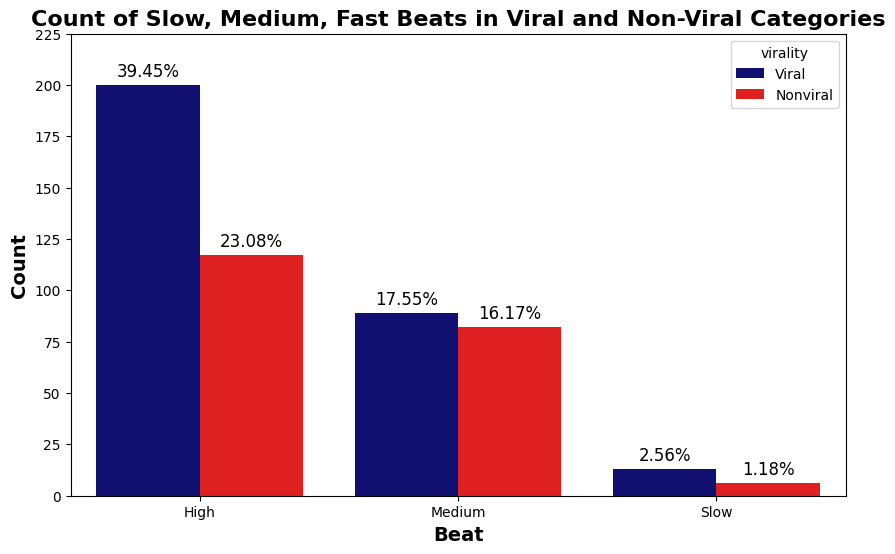

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with red and navy blue
custom_palette = sns.color_palette(["navy", "red"])

# Grouping by 'virality' and 'beat' to count occurrences
grouped_df = df_unique.groupby(['virality', 'beat']).size().reset_index(name='count')

# Counting total occurrences for each virality category
total_counts = grouped_df.groupby('virality')['count'].sum().reset_index(name='total_count')

# Merging total counts with the grouped dataframe
grouped_df = grouped_df.merge(total_counts, on='virality')

# Calculating percentage for each beat within each virality category
grouped_df['percentage'] = (grouped_df['count'] / grouped_df['total_count']) * 100

# Plotting
plt.figure(figsize=(10, 6))

# Create count plot
ax = sns.countplot(x="beat", hue="virality", data=df_unique, palette=custom_palette)

# Annotate percentage values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / len(df_unique) * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Set y-axis ticks
plt.yticks(range(0, 250, 25))

# Set title and axis labels with specified font properties
plt.title("Count of Slow, Medium, Fast Beats in Viral and Non-Viral Categories", fontweight='bold', fontsize=16)
plt.xlabel("Beat", fontweight='semibold', fontsize=14)
plt.ylabel("Count", fontweight='semibold', fontsize=14)
plt.show()

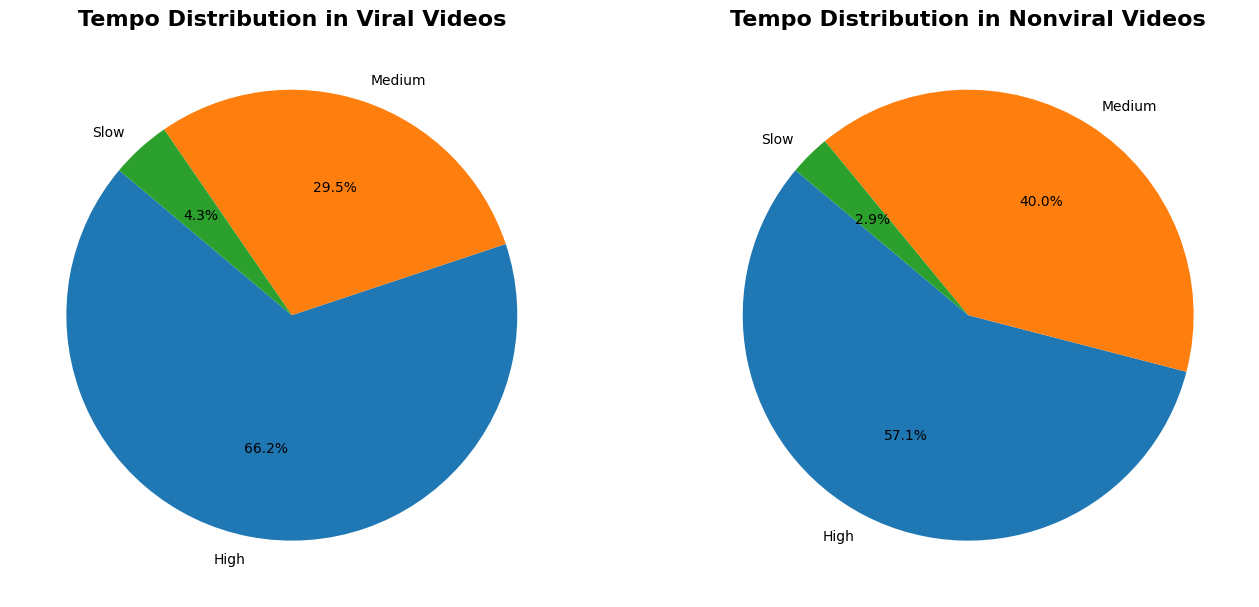

In [44]:
# Filter DataFrame for viral videos
df_viral = df_unique[df_unique['virality'] == 'Viral']
df_non_viral = df_unique[df_unique['virality'] == 'Nonviral']

# Count occurrences for each tempo in viral and non-viral videos
viral_counts = df_viral['beat'].value_counts()
non_viral_counts = df_non_viral['beat'].value_counts()

# Create subplots with two pie charts
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for viral videos
axes[0].pie(viral_counts, labels=viral_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Tempo Distribution in Viral Videos', fontweight='bold', fontsize=16)

# Make the labels (High, Medium, Slow) bold
for label in axes[0].get_xticklabels():
    label.set_fontweight('bold')

# Plot for non-viral videos
axes[1].pie(non_viral_counts, labels=non_viral_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Tempo Distribution in Nonviral Videos', fontweight='bold', fontsize=16)

# Make the labels (High, Medium, Slow) bold
for label in axes[1].get_xticklabels():
    label.set_fontweight('bold')

plt.show()

In [45]:
columns_to_keep = ~df_unique.columns.isin(['Filename', 'URL', 'webVideoUrl', 'bpm', 'likeGroup'])
df_input = df_unique.loc[:, columns_to_keep]
df_input.head()

,artist,title,likeCount,shareCount,playCount,commentCount,beat,virality
0,Justin Timberlake,Mirrors,12900,197,94900,143,High,Viral
1,Justin Timberlake,Mirrors,1723,21,72300,79,High,Nonviral
2,Pascal Letoublon,Friendships,8805,198,115300,52,Medium,Viral
3,LPTHERAPPER,Lmss,227,0,62200,4,Medium,Nonviral
4,Peter Wibe,Only Time Will Tell Vocal Mix,4326,201,81200,354,High,Nonviral


In [46]:
grouped_artist = df_input.groupby(['artist', 'beat']).size().reset_index(name='count')
aggregate_table = grouped_artist.pivot_table(index='artist', columns='beat', values='count', aggfunc='sum', fill_value=0)
aggregate_table

beat,High,Medium,Slow
artist,,,
2010 201i,1,0,0
24kGoldn,0,1,0
24kgoldn,1,0,0
5 Seconds of Summer,1,0,0
7eer,1,0,0
...,...,...,...
and Rock Mafia,1,0,0
cults,1,0,0
dullrainbow,1,0,0


In [47]:
top_artist = df_input['artist'].value_counts().head(10)
top_artist

LPTHERAPPER                  13
Pascal Letoublon              6
Justin Timberlake             5
Studio Killers                5
The Black Eyed Peas           5
The Kid LAROI                 5
Aly and AJ                    5
Pop Smoke                     4
SAINt JHN                     4
Ander Huang and DJ Kuromi     4
Name: artist, dtype: int64

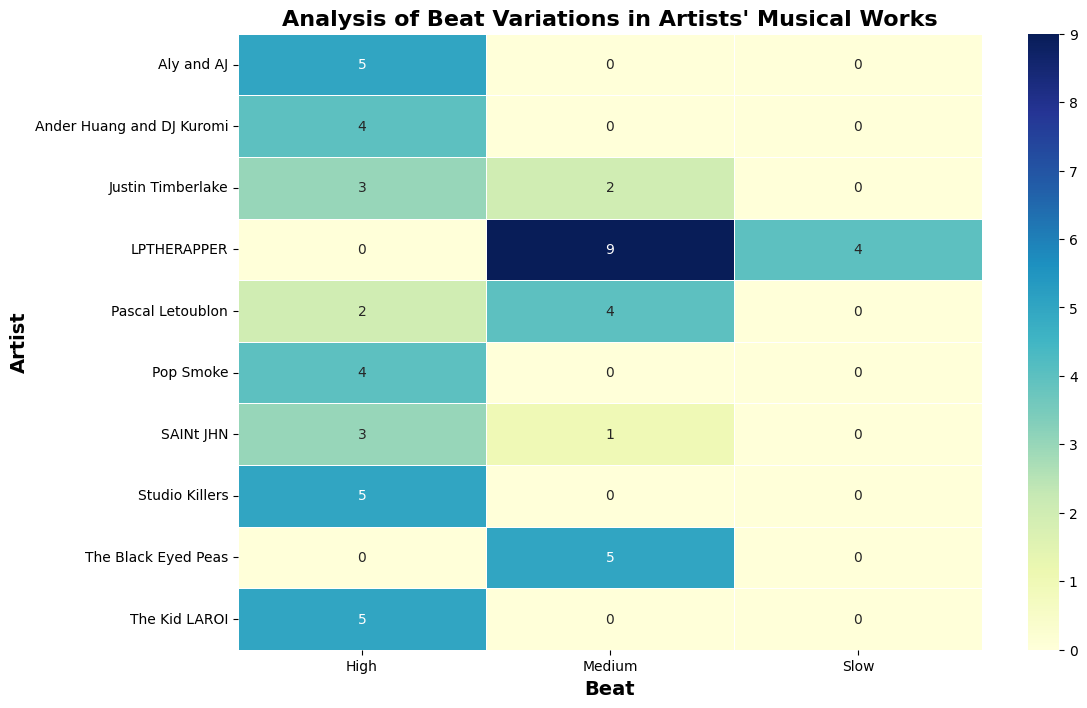

In [48]:
# Get the top 10 artists
top_artist = df_input['artist'].value_counts().head(10).index

# Filter the DataFrame for the top 10 artists
df_top_artist = df_input[df_input['artist'].isin(top_artist)]

# Group by artist and beat and calculate the count of occurrences
grouped_artist = df_top_artist.groupby(['artist', 'beat']).size().reset_index(name='count')

# Pivot the table to create the aggregate table
aggregate_table = grouped_artist.pivot_table(index='artist', columns='beat', values='count', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(aggregate_table, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title("Analysis of Beat Variations in Artists' Musical Works", fontweight='bold', fontsize=16)
plt.xlabel('Beat', fontweight='semibold', fontsize=14)
plt.ylabel('Artist', fontweight='semibold', fontsize=14)
plt.show()

In [49]:
df_input.corr()

<ipython-input-49-25d44709e6d8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,likeCount,shareCount,playCount,commentCount
likeCount,1.000000,0.637622,0.927570,0.730048
shareCount,0.637622,1.000000,0.589938,0.832444
playCount,0.927570,0.589938,1.000000,0.600411
commentCount,0.730048,0.832444,0.600411,1.000000


<ipython-input-50-8a30ca6577d3>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



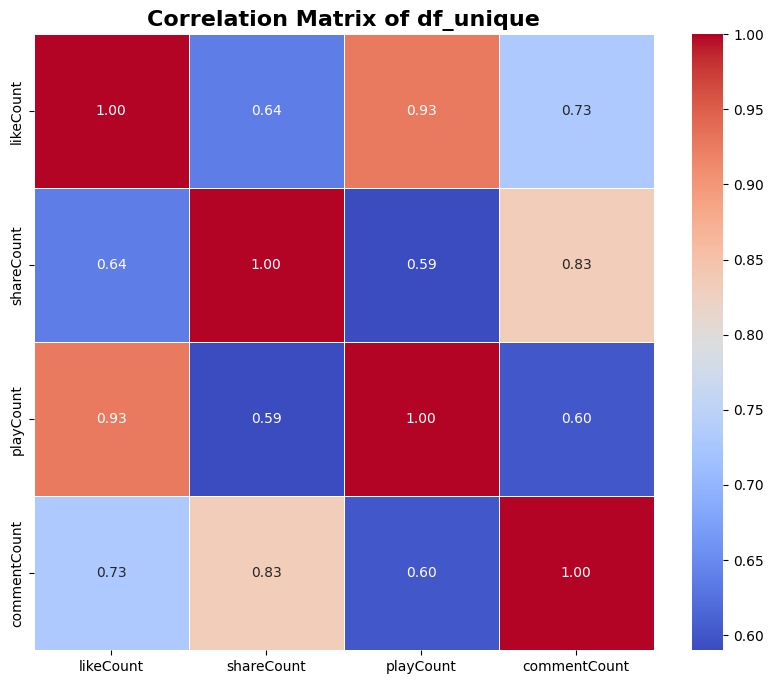

In [50]:
# Calculating the correlation matrix
correlation_matrix = df_input.corr()

# Plotting the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of df_unique", fontweight='bold', fontsize=16)
plt.show()

In [51]:
df_input['shareCount'].describe()

count       507.000000
mean       1818.562130
std       10026.887842
min           0.000000
25%          19.000000
50%          78.000000
75%         388.000000
max      164700.000000
Name: shareCount, dtype: float64

In [52]:
def grouping_shares(row):
    if row['shareCount'] >= 0 and row['shareCount'] <= 100:
        return 'Low'
    elif row['shareCount'] > 100 and row['shareCount'] <= 500:
        return 'Medium'
    elif row['shareCount'] > 500:
        return 'High'

# Apply the function along the rows (axis=1)
df_input['shareGroup'] = df_input.apply(grouping_shares, axis=1)

# Define the custom order for the shareGroup
custom_order = ['Low', 'Medium', 'High']

# Convert shareGroup to categorical with custom order
df_input['shareGroup'] = pd.Categorical(df_input['shareGroup'], categories=custom_order, ordered=True)

# Count occurrences of each shareGroup
share_group_counts = df_input['shareGroup'].value_counts().sort_index()

# Create a horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(y=share_group_counts.index, x=share_group_counts.values,
                     orientation='h',
                     marker_color='skyblue',
                     text=share_group_counts.values,
                     textposition='auto',
                     hoverinfo='x'))

fig.update_layout(
    title='Distribution of Share Groups',
    yaxis_title='Share Group',
    xaxis_title='Count',
    showlegend=False
)

fig.show()

<ipython-input-52-762b039a4585>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-52-762b039a4585>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_input

,artist,title,likeCount,shareCount,playCount,commentCount,beat,virality,shareGroup
0,Justin Timberlake,Mirrors,12900,197,94900,143,High,Viral,Medium
1,Justin Timberlake,Mirrors,1723,21,72300,79,High,Nonviral,Low
2,Pascal Letoublon,Friendships,8805,198,115300,52,Medium,Viral,Medium
3,LPTHERAPPER,Lmss,227,0,62200,4,Medium,Nonviral,Low
4,Peter Wibe,Only Time Will Tell Vocal Mix,4326,201,81200,354,High,Nonviral,Medium
...,...,...,...,...,...,...,...,...,...
601,Imagine Dragons,Believer,3716,32,124400,47,High,Nonviral,Low
602,Matthew Wilder,Break My Stride,2098,28,36700,70,Medium,Nonviral,Low
603,Master KG,Jerusalema feat Nomcebo Zikode Edit,499600,58000,9200000,6459,High,Viral,High
604,Kina,Tell Me About You,214700,1703,1200000,2694,High,Viral,High


## **Label Encoding**

In [54]:
df_input.dtypes

artist            object
title             object
likeCount          int64
shareCount         int64
playCount          int64
commentCount       int64
beat              object
virality          object
shareGroup      category
dtype: object

In [55]:
# Label encoding for 'beat', 'artist', and 'shareGroup'
df_encoded = df_input.copy()

df_encoded['beat'] = pd.Categorical(df_encoded['beat'])
df_encoded['artist'] = pd.Categorical(df_encoded['artist'])

df_encoded['beat'] = df_encoded['beat'].cat.codes
df_encoded['artist'] = df_encoded['artist'].cat.codes
df_encoded['shareGroup'] = df_encoded['shareGroup'].cat.codes

# Convert 'virality' to binary
df_encoded['virality'] = df_encoded['virality'].map({'Nonviral': 0, 'Viral': 1})

# Drop specified columns
columns_to_drop = ['title', 'likeCount', 'shareCount', 'playCount', 'commentCount']
df_encoded = df_encoded.drop(columns=columns_to_drop)

df_encoded.head()

,artist,beat,virality,shareGroup
0,179,0,1,1
1,179,0,0,0
2,269,1,1,1
3,197,1,0,0
4,272,0,0,1


## **Logistic Regression**

In [56]:
from patsy import dmatrices

y, X = dmatrices('virality ~ artist + beat + shareGroup', data=df_encoded, return_type='dataframe')

# Print the design matrices
print("Dependent Variable (y):")
print(y.head())

print("\nIndependent Variables (X):")
print(X.head())

Dependent Variable (y):
   virality
0       1.0
1       0.0
2       1.0
3       0.0
4       0.0

Independent Variables (X):
   Intercept  artist  beat  shareGroup
0        1.0   179.0   0.0         1.0
1        1.0   179.0   0.0         0.0
2        1.0   269.0   1.0         1.0
3        1.0   197.0   1.0         0.0
4        1.0   272.0   0.0         1.0


In [57]:
import statsmodels.api as sm

model = sm.Logit(y,X)

# Fit the data to each model
res = model.fit()

# Generate the summary of each model
res.summary()

Optimization terminated successfully.
         Current function value: 0.464032
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               virality   No. Observations:                  507
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            3
Date:                Thu, 28 Dec 2023   Pseudo R-squ.:                  0.3123
Time:                        12:25:23   Log-Likelihood:                -235.26
converged:                       True   LL-Null:                       -342.09
Covariance Type:            nonrobust   LLR p-value:                 4.736e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7279      0.244     -2.984      0.003      -1.206      -0.250
artist         0.0008      0.001      0.750      0.453      -0.001       0.003
beat          -0.3214      0.205     -1.570      0.117      -0.723       0.080
shareGroup     2.4107      0.235     10.276      0.000       1.951       2.870
==============================================================================
"""

### **EXPLANATION**

The logistic regression analysis results indicate that the variable most influencing virality in this dataset is 'shareGroup'. The regression coefficient for 'shareGroup' is 2.4107, and its very low p-value (< 0.05) suggests that the relationship between 'shareGroup' and 'virality' is statistically significant. In other words, when 'shareGroup' increases, the likelihood of virality also significantly increases.

On the other hand, the variable 'beat' has a coefficient of -0.3214 with a p-value of approximately 0.117, indicating that the relationship between 'beat' and 'virality' is not statistically significant at the commonly accepted level of confidence (α = 0.05). The variable 'artist' also does not have a significant impact on 'virality' with a coefficient of 0.0008 and a p-value around 0.453.

Furthermore, the pseudo R-squared value of 0.3123 suggests a moderate goodness of fit for the model, meaning that approximately 31.23% of the variability in 'virality' can be explained by the independent variables included in the model. Overall, these findings provide insight that the **'shareGroup' factor plays a significant role** in increasing the likelihood of content going viral, while 'beat' and 'artist' do not show significant influence in this context.